# Q5. Numerical Quadrature (Shanbhag)

The radius of gyration $R_G$ of an object is the average distance of points from its center-of-mass, $r_{cm}$.
Consider a heart-shaped domain $D \in R^2$ enclosed by the curve:
$$ h(t) = (16\sin^3(t), 13\cos(t) - 5\cos(2t) - 2\cos(3t) - \cos(4t)), 0 \leq t < 2\pi$$
Let $r = (x,y)$ denote a point in $R^2$

Let's import our libraries and plot $h(t)$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function

In [2]:
def h(t):
    return 16*np.sin(t)**3, 13*np.cos(t) - 5*np.cos(2*t) - 2*np.cos(3*t) - np.cos(4*t)

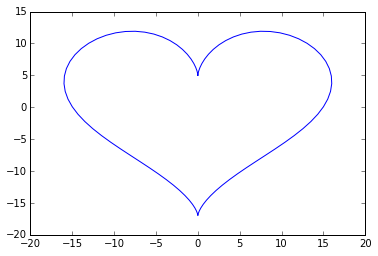

In [3]:
T = np.linspace(0, 2*np.pi, 100)
x, y = h(T)
plt.plot(x, y)

### a. What numerical method do you think is appropiate to use to estimate the area of this heart shaped region? Explain your choice.

### Answer:
Monte Carlo is an appropriate thoice to estimate the area of the region. Despite the problem being 2D, we have a complex boundary, and thus MC will make it easier to deal with this boundary.

### b. Use your method from (a.) to numerically estimate each of the following integrals to two digits of accuracy.

### b.i. The area of $D$, given by,
$$ A = \int_{r \in D} dx dy $$

### b.ii. The center of mass,
$$ r_{cm} = \frac{1}{A} \int_{r \in D} r dx dy $$

### b.iii. The radius of gyration,
$$ R^2_G = \frac{1}{A} \int_{r \in D} (r-r_{cm})^2 dx dy $$
where $(r-r_{cm})^2$ is the square of the Euclidean distance between $r$ and the center of mass $r_{cm}$.

### Answer:
Since we want to throw random points in $(x, y)$, we would like to have a function that maps $x$ to $t$.

We have $$x = 16\sin^3(t)$$ which means $$t = \arcsin\left(\sqrt[3]{\frac{x}{16}}\right)$$
So we define this function and call it $g(x)$

In [4]:
def g(x):
    return np.arcsin(np.fabs(x/16.0)**(1/3.0))

In [5]:
def MC(n_pts):
    area_rect = 32**2
    x = np.random.uniform(-16, 16, size=n_pts)
    y = np.random.uniform(-16, 16, size=n_pts)
    t1 = g(x)
    t2 = t1-np.pi
    _, y1 = h(t1)
    _, y2 = h(t2)
    cond = (y < y1) & (y > y2)
    ratio = np.sum(cond)/float(n_pts)
    area = ratio*area_rect
    area_err = np.std(cond) * area_rect / np.sqrt(n_pts)
    center_x = np.mean(x[cond])
    center_y = np.mean(y[cond])
    radius_giration = np.mean((x[cond] - center_x)**2) + np.mean((y[cond] - center_y)**2)
    
    return area, area_err, center_x, center_y, radius_giration

In [7]:
area, area_err, center_x, center_y, radius = MC(10**4)
print("The area of the heart is: ", area, " +-", area_err)
print("The center of mass is: ",center_x, center_y)
print("The radius of giration is: ", radius)

The area of the heart is:  564.4288  +- 5.09308571429
The center of mass is:  -0.111139571167 0.826406378685
The radius of giration is:  102.536356335


### c. Comment on the amount of additional work required to obtain three digits of accuracy.

[  1.61908616e+02   5.09433568e+01   1.61221963e+01   5.08915596e+00
   1.60983975e+00   5.09253582e-01   1.61022805e-01]


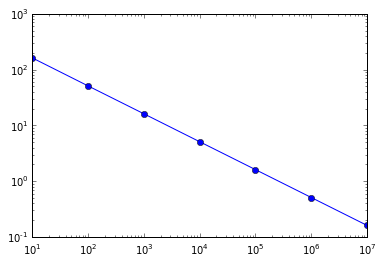

In [8]:
n_pts = 10**np.array([1, 2, 3, 4, 5, 6, 7])
errors = np.zeros(len(n_pts))
for i in range(len(n_pts)):
    _, errors[i], _, _, _ = MC(n_pts[i])
plt.loglog(n_pts, errors, 'o-')
print(errors)